# Evolución del COVID19 por Distritos en Paraguay

In [ ]:
#!pip install statsmodels

In [1]:
import mpld3, pandas as pd
mpld3.enable_notebook()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#print(plt.style.available)
#mpl.style.use(['seaborn']) # optional: for ggplot-like style

## Data Acquisition & Understanding

Descargamos manualmente los datos desde el perfil del Ministerio de Salud Pública y Bienestar Social en Tableau https://public.tableau.com/profile/mspbs#!/vizhome/COVID19PY-Registros/Descargardatos

Guardamos el archivo csv en nuestro equipo y lo leemos en un dataframe de pandas.

In [3]:
df_covid19 = pd.read_csv('datasets/covid-py/Descargar_datos_data.csv', ';')
df_covid19.tail()

,ID,Fecha Confirmacion,Sexo,Departamento Residencia,Distrito Residencia,En Albergue?,"""Edad""",Edad
10130,5,10/3/2020,FEMENINO,ASUNCION,ASUNCIÓN,NO,Edad,51
10131,4,10/3/2020,MASCULINO,ASUNCION,ASUNCIÓN,NO,Edad,54
10132,3,10/3/2020,MASCULINO,ASUNCION,ASUNCIÓN,NO,Edad,32
10133,2,10/3/2020,MASCULINO,CORDILLERA,MBOCAYATY DEL YHAGUY,NO,Edad,60
10134,1,7/3/2020,MASCULINO,CENTRAL,SAN LORENZO,NO,Edad,31


Cada registro de datos corresponde a un caso confirmado con sus datos de edad, sexo, distrito y departamento de residencia, si está en albergue o no, y la fecha de confirmación.

# Clean Data

In [4]:
# Cambiamos los nombres de la columnas
df_covid19 = df_covid19.rename(columns={"Fecha Confirmacion":"Fecha",
                                        "Departamento Residencia":"Departamento",
                                        "Distrito Residencia":"Distrito",
                                        "En Albergue?":"En_Albergue"})
df_covid19.columns

Index(['ID', 'Fecha', 'Sexo', 'Departamento', 'Distrito', 'En_Albergue',
       '"Edad"', 'Edad'],
      dtype='object')

In [5]:
# Formatear la columna Fecha d/m/Y a Y-m-d
import datetime
df_covid19['Fecha'] = df_covid19['Fecha'].apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y").strftime("%Y-%m-%d"))
df_covid19['Fecha'].tail()

10130    2020-03-10
10131    2020-03-10
10132    2020-03-10
10133    2020-03-10
10134    2020-03-07
Name: Fecha, dtype: object

In [6]:
# Convertir Fecha de object a datetime
df_covid19['Fecha'] = pd.to_datetime(df_covid19['Fecha'])
df_covid19.dtypes

ID                       int64
Fecha           datetime64[ns]
Sexo                    object
Departamento            object
Distrito                object
En_Albergue             object
"Edad"                  object
Edad                     int64
dtype: object

In [7]:
df_covid19.head()

,ID,Fecha,Sexo,Departamento,Distrito,En_Albergue,"""Edad""",Edad
0,10135,2020-08-17,MASCULINO,CENTRAL,FERNANDO DE LA MORA,NO,Edad,50
1,10134,2020-08-17,MASCULINO,ASUNCION,ASUNCIÓN,NO,Edad,38
2,10133,2020-08-17,FEMENINO,CENTRAL,FERNANDO DE LA MORA,NO,Edad,22
3,10132,2020-08-17,MASCULINO,CENTRAL,SAN LORENZO,NO,Edad,44
4,10131,2020-08-17,MASCULINO,CENTRAL,LAMBARE,NO,Edad,34


### Formateamos los datos

In [8]:
# Agrupar los distritos por fecha y contar los casos confirmados en esa fecha (no guardar cambios en el dataframe, solo visualizamos)
df_covid19.groupby('Fecha')['Distrito'].value_counts()[:10]

Fecha       Distrito            
2020-03-07  SAN LORENZO             1
2020-03-10  ASUNCIÓN                3
            MBOCAYATY DEL YHAGUY    1
2020-03-12  LIMPIO                  1
2020-03-13  ASUNCIÓN                1
2020-03-15  ASUNCIÓN                1
2020-03-16  ASUNCIÓN                1
2020-03-17  ASUNCIÓN                2
2020-03-19  ASUNCIÓN                1
            FERNANDO DE LA MORA     1
Name: Distrito, dtype: int64

In [9]:
# transformar los datos agrupados en columnas (unstack) y rellenar los elementos NaN con ceros
df_distrito = df_covid19.groupby('Fecha')['Distrito'].value_counts().unstack().fillna(0)
df_distrito.head()

Distrito,25 DE DICIEMBRE,3 DE FEBRERO,3 DE MAYO,ABAI,ALTO VERA,ALTOS,AREGUA,ARROYOS Y ESTEROS,ASUNCIÓN,AYOLAS,AZOTEY,BENJAMIN ACEVAL,BORJA,CAACUPE,CAAGUAZU,CAAPUCU,CAAZAPA,CAMBYRETA,CAPIATA,CAPIIBARY,CAPITAN BADO,CAPITAN MEZA,CAPITAN MIRANDA,CARAGUATAY,CARAPEGUA,CARAYAO,CARLOS ANTONIO LOPEZ,CARMEN DEL PARANA,CHORE,CIUDAD DEL ESTE,COLONIA INDEPENDENCIA,CONCEPCIÓN,CORONEL BOGADO,CORONEL OVIEDO,CORPUS CHRISTI,CURUGUATY,DOMINGO MARTINEZ DE IRALA,DR. JUAN LEON MALLORQUIN,DR. JUAN MANUEL FRUTOS,DR. RAUL PEÑA,EDELIRA,EMBOSCADA,ENCARNACION,EUSEBIO AYALA,FERNANDO DE LA MORA,FILADELFIA,FRAM,FRANCISCO CABALLERO ALVAREZ,FULGENCIO YEGROS,GENERAL ARTIGAS,GENERAL DELGADO,GENERAL ELIZARDO AQUINO,GENERAL ELIZARDO AQUINO - SPN,GENERAL EUGENIO A. GARAY,GENERAL HIGINIO MORINIGO,GENERAL RESQUIN,GUAJAYVI,GUARAMBARE,HERNANDARIAS,HOHENAU,HORQUETA,HUMAITA,IRUÑA,ITA,ITACURUBI DE LA CORDILLERA,ITAKYRY,ITAPE,ITAPUA POTY,ITAUGUA,ITURBE,J AUGUSTO SALDIVAR,J EULOGIO ESTIGARRIBIA,JESUS,JOSE DOMINGO OCAMPOS,JUAN DE MENA,JUAN E. O'LEARY,LA COLMENA,LA PALOMA,LAMBARE,LEANDRO OVIEDO,LIBERACION,LIMA,LIMPIO,LOMA PLATA,LORETO,LOS CEDRALES,LUQUE,MARIANO ROQUE ALONSO,MARISCAL ESTIGARRIBIA,MAURICIO JOSE TROCHE,MBOCAYATY,MBOCAYATY DEL YHAGUY,MBUYAPEY,MINGA GUAZU,MINGA PORA,MOISES BERTONI,NARANJAL,NATALICIO TALAVERA,NATALIO,NUEVA COLOMBIA,NUEVA ESPERANZA,NUEVA GERMANIA,NUEVA ITALIA,OBLIGADO,PARAGUARI,PASO YOBAI,PEDRO JUAN CABALLERO,PILAR,PIRAYU,PIRIBEBUY,PRESIDENTE FRANCO,PRIMERO DE MARZO,QUIINDY,QUYQUYHO,R.I. 3 CORRALES,RAUL ARSENIO OVIEDO,REPATRIACION,SALTOS DEL GUAIRA,SAN ALBERTO,SAN ANTONIO,SAN BERNARDINO,SAN COSME Y DAMIAN,SAN CRISTOBAL,SAN ESTANISLAO,SAN IGNACIO,SAN JOAQUIN,SAN JOSE DE LOS ARROYOS,SAN JOSE OBRERO,SAN JUAN BAUTISTA,SAN JUAN BAUTISTA DE ÑEEMBUCÚ,SAN JUAN DEL PARANA,SAN JUAN NEPOMUCENO,SAN LORENZO,SAN MIGUEL,SAN PABLO,SAN PEDRO DEL PARANA,SAN PEDRO DEL YKUAMANDYJU,SAN RAFAEL DEL PARANA,SAN ROQUE GONZALEZ,SANTA ELENA,SANTA FE DEL PARANA,SANTA RITA,SANTA ROSA,SANTA ROSA DEL AGUARAY,SANTA ROSA DEL MBUTUY,SANTA ROSA DEL MONDAY,SANTIAGO,SAPUCAI,SGTO. JOSE FELIX LOPEZ,SIMON BOLIVAR,TACUATI,TAVAI,TAVAPY,TEBICUARY,TEMBIAPORA,TOBATI,TOMAS ROMERO PEREIRA,VALENZUELA,VAQUERIA,VILLA ELISA,VILLA HAYES,VILLA OLIVA,VILLA YGATIMI,VILLARRICA,VILLETA,YABEBYRY,YAGUARON,YASY KAÑY,YATAITY DEL NORTE,YATYTAY,YBY PYTA,YBYCUI,YGUAZU,YHU,YPACARAI,YPANE,YRYVU CUA,YUTY,YVY YA'U,ÑACUNDAY,ÑEMBY,ÑUMI,﻿R.I. 3 CORRALES
Fecha,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [10]:
# Eliminar column.name "Distrito"
df_distrito.columns.name = None
# Cambiar tipo de datos del dataframe a int
df_distrito = df_distrito.astype(int)
# Resetear indice
df_distrito = df_distrito.reset_index()
# Sumar el total de confirmados por fecha y asignar a una nueva columna 'Total_Confirmado' 
df_distrito['Total_Confirmado'] = df_distrito.sum(axis=1)
df_distrito.head()

,Fecha,25 DE DICIEMBRE,3 DE FEBRERO,3 DE MAYO,ABAI,ALTO VERA,ALTOS,AREGUA,ARROYOS Y ESTEROS,ASUNCIÓN,AYOLAS,AZOTEY,BENJAMIN ACEVAL,BORJA,CAACUPE,CAAGUAZU,CAAPUCU,CAAZAPA,CAMBYRETA,CAPIATA,CAPIIBARY,CAPITAN BADO,CAPITAN MEZA,CAPITAN MIRANDA,CARAGUATAY,CARAPEGUA,CARAYAO,CARLOS ANTONIO LOPEZ,CARMEN DEL PARANA,CHORE,CIUDAD DEL ESTE,COLONIA INDEPENDENCIA,CONCEPCIÓN,CORONEL BOGADO,CORONEL OVIEDO,CORPUS CHRISTI,CURUGUATY,DOMINGO MARTINEZ DE IRALA,DR. JUAN LEON MALLORQUIN,DR. JUAN MANUEL FRUTOS,DR. RAUL PEÑA,EDELIRA,EMBOSCADA,ENCARNACION,EUSEBIO AYALA,FERNANDO DE LA MORA,FILADELFIA,FRAM,FRANCISCO CABALLERO ALVAREZ,FULGENCIO YEGROS,GENERAL ARTIGAS,GENERAL DELGADO,GENERAL ELIZARDO AQUINO,GENERAL ELIZARDO AQUINO - SPN,GENERAL EUGENIO A. GARAY,GENERAL HIGINIO MORINIGO,GENERAL RESQUIN,GUAJAYVI,GUARAMBARE,HERNANDARIAS,HOHENAU,HORQUETA,HUMAITA,IRUÑA,ITA,ITACURUBI DE LA CORDILLERA,ITAKYRY,ITAPE,ITAPUA POTY,ITAUGUA,ITURBE,J AUGUSTO SALDIVAR,J EULOGIO ESTIGARRIBIA,JESUS,JOSE DOMINGO OCAMPOS,JUAN DE MENA,JUAN E. O'LEARY,LA COLMENA,LA PALOMA,LAMBARE,LEANDRO OVIEDO,LIBERACION,LIMA,LIMPIO,LOMA PLATA,LORETO,LOS CEDRALES,LUQUE,MARIANO ROQUE ALONSO,MARISCAL ESTIGARRIBIA,MAURICIO JOSE TROCHE,MBOCAYATY,MBOCAYATY DEL YHAGUY,MBUYAPEY,MINGA GUAZU,MINGA PORA,MOISES BERTONI,NARANJAL,NATALICIO TALAVERA,NATALIO,NUEVA COLOMBIA,NUEVA ESPERANZA,NUEVA GERMANIA,NUEVA ITALIA,OBLIGADO,PARAGUARI,PASO YOBAI,PEDRO JUAN CABALLERO,PILAR,PIRAYU,PIRIBEBUY,PRESIDENTE FRANCO,PRIMERO DE MARZO,QUIINDY,QUYQUYHO,R.I. 3 CORRALES,RAUL ARSENIO OVIEDO,REPATRIACION,SALTOS DEL GUAIRA,SAN ALBERTO,SAN ANTONIO,SAN BERNARDINO,SAN COSME Y DAMIAN,SAN CRISTOBAL,SAN ESTANISLAO,SAN IGNACIO,SAN JOAQUIN,SAN JOSE DE LOS ARROYOS,SAN JOSE OBRERO,SAN JUAN BAUTISTA,SAN JUAN BAUTISTA DE ÑEEMBUCÚ,SAN JUAN DEL PARANA,SAN JUAN NEPOMUCENO,SAN LORENZO,SAN MIGUEL,SAN PABLO,SAN PEDRO DEL PARANA,SAN PEDRO DEL YKUAMANDYJU,SAN RAFAEL DEL PARANA,SAN ROQUE GONZALEZ,SANTA ELENA,SANTA FE DEL PARANA,SANTA RITA,SANTA ROSA,SANTA ROSA DEL AGUARAY,SANTA ROSA DEL MBUTUY,SANTA ROSA DEL MONDAY,SANTIAGO,SAPUCAI,SGTO. JOSE FELIX LOPEZ,SIMON BOLIVAR,TACUATI,TAVAI,TAVAPY,TEBICUARY,TEMBIAPORA,TOBATI,TOMAS ROMERO PEREIRA,VALENZUELA,VAQUERIA,VILLA ELISA,VILLA HAYES,VILLA OLIVA,VILLA YGATIMI,VILLARRICA,VILLETA,YABEBYRY,YAGUARON,YASY KAÑY,YATAITY DEL NORTE,YATYTAY,YBY PYTA,YBYCUI,YGUAZU,YHU,YPACARAI,YPANE,YRYVU CUA,YUTY,YVY YA'U,ÑACUNDAY,ÑEMBY,ÑUMI,﻿R.I. 3 CORRALES,Total_Confirmado
0,2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2020-03-10,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,2020-03-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2020-03-13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2020-03-15,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

El dataframe __df_distrito__ tiene filas solo para las fechas donde hubo casos confirmados. Debemos agregar filas para las fechas donde no hubo casos confirmados (0 confirmados)

In [11]:
# instanciar un nuevo dataframe df_series con una columna Fecha
df_series = pd.DataFrame(columns=['Fecha'])

# cargar el nuevo dataframe con el rango de fechas comprendidos entre la fecha mínima y máxima de df_distrito
df_series['Fecha'] = pd.date_range(start=df_distrito['Fecha'].min(), end=df_distrito['Fecha'].max())
df_series.head()

,Fecha
0,2020-03-07
1,2020-03-08
2,2020-03-09
3,2020-03-10
4,2020-03-11


In [12]:
# combinar los dataframes df_series y df_distrito en un nuevo dataframe df_distrito_series. Rellenar los elementos NaN con cero
df_distrito_series = pd.merge(df_series, df_distrito, how='left', on='Fecha').fillna(0)
df_distrito_series.head()

,Fecha,25 DE DICIEMBRE,3 DE FEBRERO,3 DE MAYO,ABAI,ALTO VERA,ALTOS,AREGUA,ARROYOS Y ESTEROS,ASUNCIÓN,AYOLAS,AZOTEY,BENJAMIN ACEVAL,BORJA,CAACUPE,CAAGUAZU,CAAPUCU,CAAZAPA,CAMBYRETA,CAPIATA,CAPIIBARY,CAPITAN BADO,CAPITAN MEZA,CAPITAN MIRANDA,CARAGUATAY,CARAPEGUA,CARAYAO,CARLOS ANTONIO LOPEZ,CARMEN DEL PARANA,CHORE,CIUDAD DEL ESTE,COLONIA INDEPENDENCIA,CONCEPCIÓN,CORONEL BOGADO,CORONEL OVIEDO,CORPUS CHRISTI,CURUGUATY,DOMINGO MARTINEZ DE IRALA,DR. JUAN LEON MALLORQUIN,DR. JUAN MANUEL FRUTOS,DR. RAUL PEÑA,EDELIRA,EMBOSCADA,ENCARNACION,EUSEBIO AYALA,FERNANDO DE LA MORA,FILADELFIA,FRAM,FRANCISCO CABALLERO ALVAREZ,FULGENCIO YEGROS,GENERAL ARTIGAS,GENERAL DELGADO,GENERAL ELIZARDO AQUINO,GENERAL ELIZARDO AQUINO - SPN,GENERAL EUGENIO A. GARAY,GENERAL HIGINIO MORINIGO,GENERAL RESQUIN,GUAJAYVI,GUARAMBARE,HERNANDARIAS,HOHENAU,HORQUETA,HUMAITA,IRUÑA,ITA,ITACURUBI DE LA CORDILLERA,ITAKYRY,ITAPE,ITAPUA POTY,ITAUGUA,ITURBE,J AUGUSTO SALDIVAR,J EULOGIO ESTIGARRIBIA,JESUS,JOSE DOMINGO OCAMPOS,JUAN DE MENA,JUAN E. O'LEARY,LA COLMENA,LA PALOMA,LAMBARE,LEANDRO OVIEDO,LIBERACION,LIMA,LIMPIO,LOMA PLATA,LORETO,LOS CEDRALES,LUQUE,MARIANO ROQUE ALONSO,MARISCAL ESTIGARRIBIA,MAURICIO JOSE TROCHE,MBOCAYATY,MBOCAYATY DEL YHAGUY,MBUYAPEY,MINGA GUAZU,MINGA PORA,MOISES BERTONI,NARANJAL,NATALICIO TALAVERA,NATALIO,NUEVA COLOMBIA,NUEVA ESPERANZA,NUEVA GERMANIA,NUEVA ITALIA,OBLIGADO,PARAGUARI,PASO YOBAI,PEDRO JUAN CABALLERO,PILAR,PIRAYU,PIRIBEBUY,PRESIDENTE FRANCO,PRIMERO DE MARZO,QUIINDY,QUYQUYHO,R.I. 3 CORRALES,RAUL ARSENIO OVIEDO,REPATRIACION,SALTOS DEL GUAIRA,SAN ALBERTO,SAN ANTONIO,SAN BERNARDINO,SAN COSME Y DAMIAN,SAN CRISTOBAL,SAN ESTANISLAO,SAN IGNACIO,SAN JOAQUIN,SAN JOSE DE LOS ARROYOS,SAN JOSE OBRERO,SAN JUAN BAUTISTA,SAN JUAN BAUTISTA DE ÑEEMBUCÚ,SAN JUAN DEL PARANA,SAN JUAN NEPOMUCENO,SAN LORENZO,SAN MIGUEL,SAN PABLO,SAN PEDRO DEL PARANA,SAN PEDRO DEL YKUAMANDYJU,SAN RAFAEL DEL PARANA,SAN ROQUE GONZALEZ,SANTA ELENA,SANTA FE DEL PARANA,SANTA RITA,SANTA ROSA,SANTA ROSA DEL AGUARAY,SANTA ROSA DEL MBUTUY,SANTA ROSA DEL MONDAY,SANTIAGO,SAPUCAI,SGTO. JOSE FELIX LOPEZ,SIMON BOLIVAR,TACUATI,TAVAI,TAVAPY,TEBICUARY,TEMBIAPORA,TOBATI,TOMAS ROMERO PEREIRA,VALENZUELA,VAQUERIA,VILLA ELISA,VILLA HAYES,VILLA OLIVA,VILLA YGATIMI,VILLARRICA,VILLETA,YABEBYRY,YAGUARON,YASY KAÑY,YATAITY DEL NORTE,YATYTAY,YBY PYTA,YBYCUI,YGUAZU,YHU,YPACARAI,YPANE,YRYVU CUA,YUTY,YVY YA'U,ÑACUNDAY,ÑEMBY,ÑUMI,﻿R.I. 3 CORRALES,Total_Confirmado
0,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [13]:
# Establecer la columna Fecha como index
df_distrito_series.set_index('Fecha', inplace = True)
# Eliminar el nombre del index
df_distrito_series.index.name = None
# Establecer el tipo de datos del dataframe como int
df_distrito_series = df_distrito_series.astype('int')

df_distrito_series.head()

,25 DE DICIEMBRE,3 DE FEBRERO,3 DE MAYO,ABAI,ALTO VERA,ALTOS,AREGUA,ARROYOS Y ESTEROS,ASUNCIÓN,AYOLAS,AZOTEY,BENJAMIN ACEVAL,BORJA,CAACUPE,CAAGUAZU,CAAPUCU,CAAZAPA,CAMBYRETA,CAPIATA,CAPIIBARY,CAPITAN BADO,CAPITAN MEZA,CAPITAN MIRANDA,CARAGUATAY,CARAPEGUA,CARAYAO,CARLOS ANTONIO LOPEZ,CARMEN DEL PARANA,CHORE,CIUDAD DEL ESTE,COLONIA INDEPENDENCIA,CONCEPCIÓN,CORONEL BOGADO,CORONEL OVIEDO,CORPUS CHRISTI,CURUGUATY,DOMINGO MARTINEZ DE IRALA,DR. JUAN LEON MALLORQUIN,DR. JUAN MANUEL FRUTOS,DR. RAUL PEÑA,EDELIRA,EMBOSCADA,ENCARNACION,EUSEBIO AYALA,FERNANDO DE LA MORA,FILADELFIA,FRAM,FRANCISCO CABALLERO ALVAREZ,FULGENCIO YEGROS,GENERAL ARTIGAS,GENERAL DELGADO,GENERAL ELIZARDO AQUINO,GENERAL ELIZARDO AQUINO - SPN,GENERAL EUGENIO A. GARAY,GENERAL HIGINIO MORINIGO,GENERAL RESQUIN,GUAJAYVI,GUARAMBARE,HERNANDARIAS,HOHENAU,HORQUETA,HUMAITA,IRUÑA,ITA,ITACURUBI DE LA CORDILLERA,ITAKYRY,ITAPE,ITAPUA POTY,ITAUGUA,ITURBE,J AUGUSTO SALDIVAR,J EULOGIO ESTIGARRIBIA,JESUS,JOSE DOMINGO OCAMPOS,JUAN DE MENA,JUAN E. O'LEARY,LA COLMENA,LA PALOMA,LAMBARE,LEANDRO OVIEDO,LIBERACION,LIMA,LIMPIO,LOMA PLATA,LORETO,LOS CEDRALES,LUQUE,MARIANO ROQUE ALONSO,MARISCAL ESTIGARRIBIA,MAURICIO JOSE TROCHE,MBOCAYATY,MBOCAYATY DEL YHAGUY,MBUYAPEY,MINGA GUAZU,MINGA PORA,MOISES BERTONI,NARANJAL,NATALICIO TALAVERA,NATALIO,NUEVA COLOMBIA,NUEVA ESPERANZA,NUEVA GERMANIA,NUEVA ITALIA,OBLIGADO,PARAGUARI,PASO YOBAI,PEDRO JUAN CABALLERO,PILAR,PIRAYU,PIRIBEBUY,PRESIDENTE FRANCO,PRIMERO DE MARZO,QUIINDY,QUYQUYHO,R.I. 3 CORRALES,RAUL ARSENIO OVIEDO,REPATRIACION,SALTOS DEL GUAIRA,SAN ALBERTO,SAN ANTONIO,SAN BERNARDINO,SAN COSME Y DAMIAN,SAN CRISTOBAL,SAN ESTANISLAO,SAN IGNACIO,SAN JOAQUIN,SAN JOSE DE LOS ARROYOS,SAN JOSE OBRERO,SAN JUAN BAUTISTA,SAN JUAN BAUTISTA DE ÑEEMBUCÚ,SAN JUAN DEL PARANA,SAN JUAN NEPOMUCENO,SAN LORENZO,SAN MIGUEL,SAN PABLO,SAN PEDRO DEL PARANA,SAN PEDRO DEL YKUAMANDYJU,SAN RAFAEL DEL PARANA,SAN ROQUE GONZALEZ,SANTA ELENA,SANTA FE DEL PARANA,SANTA RITA,SANTA ROSA,SANTA ROSA DEL AGUARAY,SANTA ROSA DEL MBUTUY,SANTA ROSA DEL MONDAY,SANTIAGO,SAPUCAI,SGTO. JOSE FELIX LOPEZ,SIMON BOLIVAR,TACUATI,TAVAI,TAVAPY,TEBICUARY,TEMBIAPORA,TOBATI,TOMAS ROMERO PEREIRA,VALENZUELA,VAQUERIA,VILLA ELISA,VILLA HAYES,VILLA OLIVA,VILLA YGATIMI,VILLARRICA,VILLETA,YABEBYRY,YAGUARON,YASY KAÑY,YATAITY DEL NORTE,YATYTAY,YBY PYTA,YBYCUI,YGUAZU,YHU,YPACARAI,YPANE,YRYVU CUA,YUTY,YVY YA'U,ÑACUNDAY,ÑEMBY,ÑUMI,﻿R.I. 3 CORRALES,Total_Confirmado
2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-10,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2020-03-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
# Calcular el valor acumulado de la columna Total_Confirmado y guardar el resultado en una nueva columna 'Acumulado'
df_distrito_series['Acumulado'] = df_distrito_series['Total_Confirmado'].cumsum()
df_distrito_series[['Acumulado']].tail()

,Acumulado
2020-08-13,8389
2020-08-14,9022
2020-08-15,9381
2020-08-16,9791
2020-08-17,10135


In [15]:
# Comprobar si el total acumulado para la última fecha coincide con la suma de confirmados
df_distrito_series['Total_Confirmado'].sum()

10135

In [16]:
# calculando el porcentaje de variación del día.
df_distrito_series['var_diaria'] = df_distrito_series['Acumulado'].pct_change()
df_distrito_series['var_diaria'][:10]

2020-03-07         NaN
2020-03-08    0.000000
2020-03-09    0.000000
2020-03-10    4.000000
2020-03-11    0.000000
2020-03-12    0.200000
2020-03-13    0.166667
2020-03-14    0.000000
2020-03-15    0.142857
2020-03-16    0.125000
Name: var_diaria, dtype: float64

# Data Visualisation

In [17]:
# imprimir todos los estilos disponible para el gráfico
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


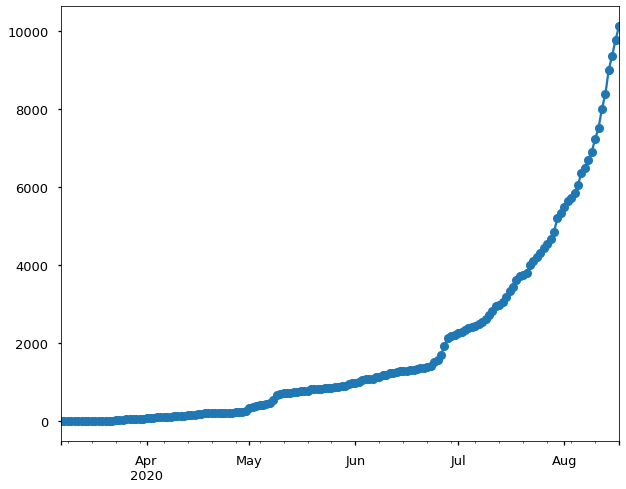

In [18]:
#seaborn-talk, 
mpl.style.use(['seaborn-talk'])
# Graficar el Total Acumulado
axes = df_distrito_series['Acumulado'].plot(figsize=(10, 8), marker='o')

labels = list(df_distrito_series[['Acumulado']].columns.values)
for i in range(len(labels)):
    tooltip = mpld3.plugins.LineLabelTooltip(axes.get_lines()[i], labels[i])
    mpld3.plugins.connect(plt.gcf(), tooltip) 

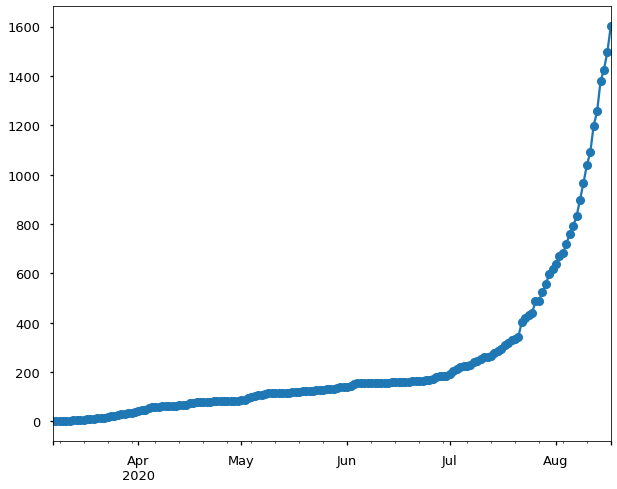

In [19]:
# Crear un dataframe con los casos confirmados del distrito de ASUNCIÓN
df_asuncion = df_distrito_series.loc[df_distrito_series.index, 'ASUNCIÓN'].to_frame()
# Calcular el acumulado del distrito
df_asuncion['Acumulado'] = df_asuncion['ASUNCIÓN'].cumsum()
# Graficar
plot_asuncion = df_asuncion['Acumulado'].plot(figsize=(10, 8), marker='o')


In [20]:
# Definir una función que reciva como parámetro el nombre del distrito, cree un df temporal, calcule el acumulado y grafique
def plotDistrito(distrito):
    df_distrito_temp = df_distrito_series.loc[df_distrito_series.index, distrito]
    df_distrito_temp = df_distrito_temp.cumsum()
    plot_distrito = df_distrito_temp.plot(figsize=(10, 8), style='-o', fontsize=12)
    plt.style.use(['dark_background'])
    plt.title('Confirmados por Ciudad')
    plt.ylabel('Confirmados')
    plt.xlabel('Fecha')
    plt.figure()
    return plot_distrito

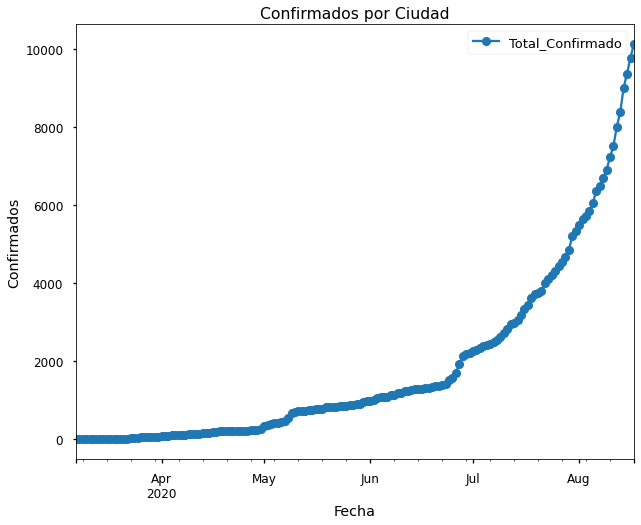

<Figure size 748.8x514.8 with 0 Axes>

In [21]:
plotDistrito(['Total_Confirmado'])

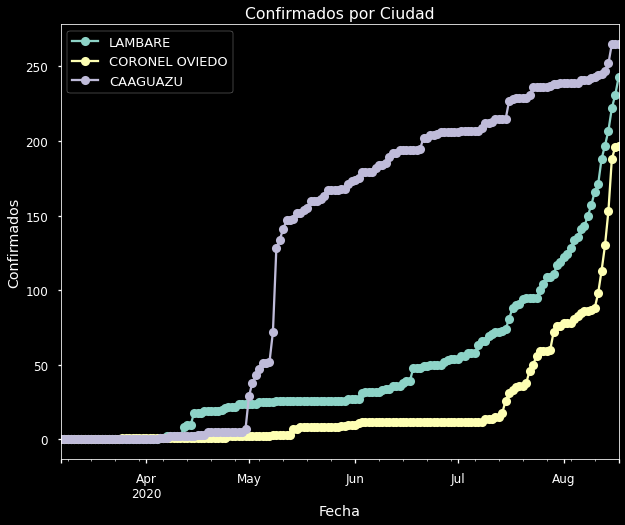

<Figure size 748.8x514.8 with 0 Axes>

In [22]:
plotDistrito(['LAMBARE', 'CORONEL OVIEDO', 'CAAGUAZU'])

# Total de Casos por Distrito discrimidado por Albergue

In [23]:
# Visualizamos las columnas Distrito y En_Albergue de df_covid19
df_covid19[['Distrito', 'En_Albergue']].head()

,Distrito,En_Albergue
0,FERNANDO DE LA MORA,NO
1,ASUNCIÓN,NO
2,FERNANDO DE LA MORA,NO
3,SAN LORENZO,NO
4,LAMBARE,NO


In [24]:
# Contamos la cantidad de confirmados que hay en albergue y fuera de albergue por Distrito
df_albergue = pd.crosstab(df_covid19['Distrito'], df_covid19['En_Albergue']).add_prefix('Albergue_')
df_albergue.head()

En_Albergue,Albergue_NO,Albergue_SI
Distrito,,
25 DE DICIEMBRE,1,0
3 DE FEBRERO,1,0
3 DE MAYO,2,0
ABAI,0,10
ALTO VERA,1,3


In [25]:
# Renombramos las columnas
df_albergue = df_albergue.rename(columns={"Albergue_NO":"Fuera_de_Albergue",
                                          "Albergue_SI":"En_Albergue"})

# Eliminamos los nombres de las columnas e índice
df_albergue.columns.name = None
df_albergue.index.name = None

# Agregamos una columna con el total de confirmados por Distrito
df_albergue['Total'] = df_albergue.sum(axis=1)

# Ordenamos de forma descendente
df_albergue.sort_values(by='Total', ascending=False, inplace=True)

print('Total_Confirmados:', df_albergue['Total'].sum())
df_albergue.head()

Total_Confirmados: 10135


,Fuera_de_Albergue,En_Albergue,Total
CIUDAD DEL ESTE,2795,141,2936
ASUNCIÓN,1480,122,1602
SAN LORENZO,435,9,444
PRESIDENTE FRANCO,326,13,339
HERNANDARIAS,320,15,335


# Casos confirmados Dentro y Fuera de Albergue

Podemos filtrar si están dentro o fuera del albergue

In [26]:
df_covid19.loc[df_covid19['En_Albergue'] == 'NO'].head()

,ID,Fecha,Sexo,Departamento,Distrito,En_Albergue,"""Edad""",Edad
0,10135,2020-08-17,MASCULINO,CENTRAL,FERNANDO DE LA MORA,NO,Edad,50
1,10134,2020-08-17,MASCULINO,ASUNCION,ASUNCIÓN,NO,Edad,38
2,10133,2020-08-17,FEMENINO,CENTRAL,FERNANDO DE LA MORA,NO,Edad,22
3,10132,2020-08-17,MASCULINO,CENTRAL,SAN LORENZO,NO,Edad,44
4,10131,2020-08-17,MASCULINO,CENTRAL,LAMBARE,NO,Edad,34


Definimos una funcion que devuelva un dataframe formateado con los datos filtrados por albergue o no

In [27]:
def enAlbergue(value):
    df_filtered = df_covid19.loc[df_covid19['En_Albergue'] == value]
    return cleanData(df_filtered)

Definimos una funcion que formatee el dataframe con los datos de covid. Aplicamos los procedimientos ya conocidos para formatear los datos

In [28]:
def cleanData(df_covid):
    df_dist = df_covid.groupby('Fecha')['Distrito'].value_counts().unstack().fillna(0)
    # Eliminar column.name "Distrito"
    df_dist.columns.name = None
    # Resetear indice
    df_dist = df_dist.reset_index()
    # Sumar el total de confirmados por fecha y asignar a una nueva columna 'Total_Confirmado' 
    df_dist['Total_Confirmado'] = df_dist.sum(axis=1)

    # instanciar un nuevo dataframe df_series_fuera_alb con una columna Fecha
    df_series = pd.DataFrame(columns=['Fecha'])
    # cargar el nuevo dataframe con el rango de fechas comprendidos entre la fecha mínima y máxima de df_dist_fuera_alb
    df_series['Fecha'] = pd.date_range(start=df_dist['Fecha'].min(), end=df_dist['Fecha'].max())
    df_series.head()

    # combinar los dataframes df_series y df_dist en un nuevo dataframe df_dist_series
    # Rellenar los elementos NaN con cero
    df_dist_series = pd.merge(df_series, df_dist, how='left', on='Fecha').fillna(0)
    # Establecer la columna Fecha como index
    df_dist_series.set_index('Fecha', inplace = True)
    # Eliminar el nombre del index
    df_dist_series.index.name = None
    # Establecer el tipo de datos del dataframe como int
    df_dist_series = df_dist_series.astype('int')

    # Calcular el valor acumulado de la columna Total_Confirmado y guardar el resultado en una nueva columna 'Acumulado'
    #df_dist_series['Acumulado'] = df_dist_series['Total_Confirmado'].cumsum()
    return df_dist_series

    #df_series.head()

Definimos una función que cree un df temporal y grafique. Recive como parámetro el nombre del distrito y albergue

In [29]:
# Definimos una función que cree un df temporal y grafique. Recive como parámetro el nombre del distrito y albergue
def plotCovid(distrito, albergue):
    df_distrito_temp = enAlbergue(albergue).loc[enAlbergue(albergue).index, distrito]
    df_distrito_temp = df_distrito_temp.cumsum()
    plot_distrito = df_distrito_temp.plot(figsize=(10, 8), style='-o', fontsize=12)
    plt.style.use(['dark_background'])
    plt.title('Confirmados por Ciudad')
    plt.ylabel('Confirmados')
    plt.xlabel('Fecha')
    plt.figure()
    return plot_distrito

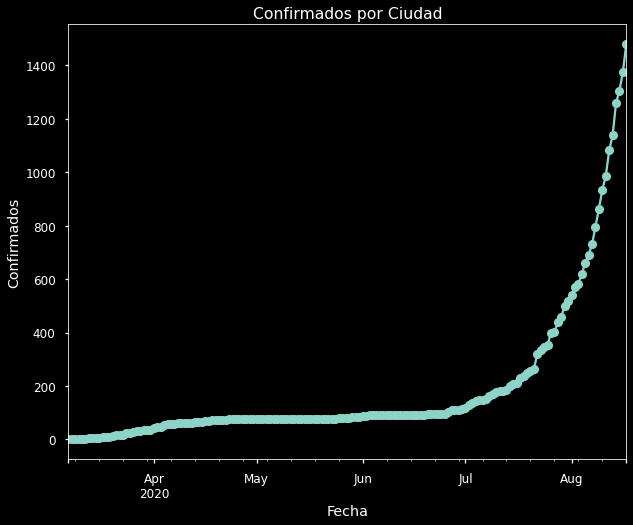

<Figure size 748.8x514.8 with 0 Axes>

In [30]:
plotCovid('ASUNCIÓN', 'NO')

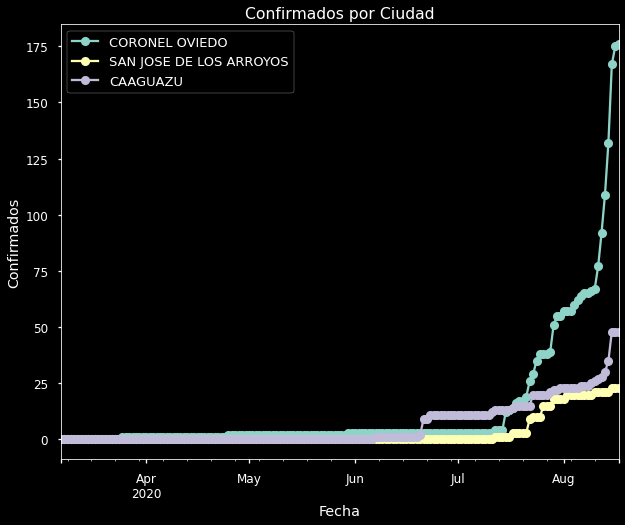

<Figure size 748.8x514.8 with 0 Axes>

In [31]:
plotCovid(['CORONEL OVIEDO', 'SAN JOSE DE LOS ARROYOS', 'CAAGUAZU'], 'NO')

In [32]:
df_covid19['Distrito'].unique().tolist()

['FERNANDO DE LA MORA',
 'ASUNCIÓN',
 'SAN LORENZO',
 'LAMBARE',
 'SAN CRISTOBAL',
 'HERNANDARIAS',
 'VILLA ELISA',
 'ÑEMBY',
 'CIUDAD DEL ESTE',
 'CAPIATA',
 'PRESIDENTE FRANCO',
 'LUQUE',
 'J AUGUSTO SALDIVAR',
 'LIMPIO',
 'YPANE',
 'SAN IGNACIO',
 'CONCEPCIÓN',
 'ITAUGUA',
 'LA COLMENA',
 'SANTA RITA',
 'MINGA GUAZU',
 'FILADELFIA',
 'ITA',
 'MARIANO ROQUE ALONSO',
 'SANTA FE DEL PARANA',
 'VILLARRICA',
 'ENCARNACION',
 'CAACUPE',
 'PEDRO JUAN CABALLERO',
 'YAGUARON',
 'VILLA HAYES',
 'TOBATI',
 'PILAR',
 'EMBOSCADA',
 'BENJAMIN ACEVAL',
 'SAN ESTANISLAO',
 'SANTA ROSA DEL AGUARAY',
 'CORONEL OVIEDO',
 'SANTA ROSA',
 'LOS CEDRALES',
 'YUTY',
 'MBOCAYATY',
 'CARAPEGUA',
 'SAN ANTONIO',
 'VILLETA',
 'ÑUMI',
 'PARAGUARI',
 'MAURICIO JOSE TROCHE',
 'TEBICUARY',
 'COLONIA INDEPENDENCIA',
 'DR. JUAN LEON MALLORQUIN',
 'ITAKYRY',
 'GUARAMBARE',
 'SAN JUAN BAUTISTA DE ÑEEMBUCÚ',
 'PIRIBEBUY',
 'DOMINGO MARTINEZ DE IRALA',
 'PRIMERO DE MARZO',
 'GENERAL ELIZARDO AQUINO',
 'ALTOS',
 'TOMAS RO